# Building graphics with Python

Lino Galiana  
2025-10-06

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/visualisation/matplotlib.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«matplotlib»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/visualisation%20matplotlib%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«matplotlib»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/visualisation%20matplotlib%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/visualisation/matplotlib.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **What you will learn in this chapter**
>
> -   Get to know the [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/) ecosystems, and learn how to build charts by progressively layering elements.
> -   Explore the modern [`plotnine`](https://plotnine.readthedocs.io/en/stable/index.html) library — a `Python` implementation of `R`’s [`ggplot2`](https://ggplot2.tidyverse.org/) — which provides a powerful grammar of graphics for constructing visualizations.
> -   Understand how to create interactive, web-based visualizations using the [`plotly`](https://plotly.com/python/) and [`altair`](https://altair-viz.github.io/) packages.
> -   Learn about the key principles of effective data visualization, including the trade-offs involved in delivering a clear message and the limitations of some traditional chart types.

This chapter focuses on data visualization and presents a classic task for *data scientists* and *data engineers*: constructing figures that populate an analytical dashboard, providing a retrospective view of a phenomenon of interest.

To illustrate this, we are going to reproduce several charts available on the <a href="https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&amp;disjunctive.nom_compteur&amp;disjunctive.id&amp;disjunctive.name" target="_blank">City of Paris’ <em>open data</em> portal </a>. Since these charts do not always adhere to best practices in data visualization, we will at times modify them in order to make the represented information more accessible.

The ability to construct effective and engaging data visualizations is an essential skill for any *data scientist* or researcher. To improve the quality of such visualizations, it is advisable to follow the recommendations offered by specialists in *dataviz* and graphic semiology.

High-quality visualizations, such as those produced by the *New York Times*, depend not only on the use of appropriate tools (for example, JavaScript libraries), but also on adherence to established principles of representation that allow the message of a visualization to be grasped within seconds.

Because it is not easy to convey complex information to an audience in a clear and synthetic manner, it is important to consider both the reception of a visualization and the principal messages it is intended to communicate. This <a href="https://ssphub.netlify.app/talk/2024-02-29-mauviere/" target="_blank">presentation by Eric Mauvière </a> illustrates, through numerous examples, how visualization choices influence the effectiveness of the message delivered.

Among other resources that I have found particularly useful, this blog post by <a href="https://blog.datawrapper.de/text-in-data-visualizations/" target="_blank"><code>datawrapper</code> </a>, a reference in the field of visualization, is especially insightful. This <a href="https://albert-rapp.de/posts/ggplot2-tips/10_recreating_swd_look/10_recreating_swd_look" target="_blank">blog post </a> by Albert Rapp also demonstrates how to progressively construct an effective visualization and is well worth revisiting periodically. Finally, among the sites that merit frequent consultation, the resources available on Andrew Heiss’s <a href="https://www.andrewheiss.com/blog/" target="_blank">blog </a> are of considerable value.

Several major families of graphical representations can be distinguished: visualizations of distributions for a single variable, visualizations of relationships between multiple variables, and maps that allow one or more variables to be represented in space.

Each of these families encompasses a variety of specific figure types. For example, depending on the nature of the phenomenon, visualizations of relationships may take the form of a time series (the evolution of a variable over time), a scatter plot (the correlation between two variables), or a bar chart (illustrating the relative relationship between the values of one variable in relation to another), among others.

Rather than attempting to provide an exhaustive catalogue of possible visualizations, this chapter and the next will present a selection designed to encourage further analysis prior to the implementation of any modeling. This chapter focuses on traditional visualizations, while the <a href="../../content/visualization/maps.qmd" target="_blank">following chapter </a> is devoted to cartography. Together, these chapters aim to provide an initial framework for synthesizing the information contained in a dataset.

The subsequent step is to advance the work of communication and synthesis through outputs that may take diverse forms, such as reports, scientific publications, articles, presentations, interactive applications, websites, or *notebooks* such as those used in this course. The general principle remains the same regardless of the *medium*, and is of particular interest to *data scientists* when the task involves intensive use of data and requires a reproducible *output*. A chapter dedicated to this topic may be added to the course in the future[1].

> **Use an interactive interface to visualize graphics**
>
> For visualization chapters, it is highly recommended to use `Python` via an interactive interface such as a *notebook Jupyter* (via `VSCode` or `Jupyter` for example, see <a href="../../content/getting-started/01_environment.qmd" target="_blank">the notebook presentation chapter </a>).
>
> This makes it possible to view the graphics immediately below each code cell, to adjust them easily, and to test modifications in real time.
> Conversely, if scripts are run from a conventional console (e.g., by writing to a `.py` file and executing line by line with <kbd>MAJ</kbd>+,<kbd>ENTREE</kbd> in `VSCode`), the graphics will not be displayed in a popup window\_ requiring additional commands to save them, before opening the exports manually and being able to correct the code if necessary. This makes for a more laborious learning experience.

## Data

This chapter is based on the bicycle passage count data from Parisian measurement points, published on the open data website of the City of Paris.

The analysis of recent historical data has been made easier by the availability of datasets in the `Parquet` format, a modern alternative that is more efficient and convenient than CSV. Further information on this format can be found in the resources cited in the paragraph dedicated to it in the <a href="../../content/manipulation/05_parquet_s3.qmd" target="_blank">final chapter of the section on data manipulation </a>.

[1] This forthcoming chapter will be structured around the <a href="https://quarto.org/" target="_blank"> <code>Quarto</code> </a> ecosystem. In the meantime, readers are encouraged to consult the exemplary documentation available for this ecosystem and to experiment with it directly, as this remains the most effective way to learn.

In [ ]:
import os
import requests
from tqdm import tqdm
import pandas as pd
import duckdb

url = "https://minio.lab.sspcloud.fr/lgaliana/data/python-ENSAE/comptage-velo-donnees-compteurs.parquet"
# problem with https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/comptage-velo-donnees-compteurs/exports/parquet?lang=fr&timezone=Europe%2FParis

filename = 'comptage_velo_donnees_compteurs.parquet'


# DOWNLOAD FILE --------------------------------

# Perform the HTTP request and stream the download
response = requests.get(url, stream=True)

if not os.path.exists(filename):
    # Perform the HTTP request and stream the download
    response = requests.get(url, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the total size of the file from the headers
        total_size = int(response.headers.get('content-length', 0))

        # Open the file in write-binary mode and use tqdm to show progress
        with open(filename, 'wb') as file, tqdm(
                desc=filename,
                total=total_size,
                unit='B',
                unit_scale=True,
                unit_divisor=1024,
        ) as bar:
            # Write the file in chunks
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:  # filter out keep-alive chunks
                    file.write(chunk)
                    bar.update(len(chunk))
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
else:
    print(f"The file '{filename}' already exists.")

# READ FILE AND CONVERT TO PANDAS --------------------------

query = """
SELECT id_compteur, nom_compteur, id, sum_counts, date
FROM read_parquet('comptage_velo_donnees_compteurs.parquet')
"""

# READ WITH DUCKDB AND CONVERT TO PANDAS
df = duckdb.sql(query).df()

To import the graphical libraries we will use in this chapter, execute

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

> **Warning**
>
> Importing libraries in the form `from package import *` is not a very good practice.
>
> However, for a *package* like `plotnine`, many of whose functions we’ll be using, it would be a bit tedious to import functions on a case-by-case basis. What’s more, it allows us to reuse the `ggplot` `R` library code examples, which are plentiful on the Internet with visual demonstrations, almost as they are. `from package import *` is the `Python` equivalent of the `library(package)` practice in `R`.

Since we will regularly recreate variations of the same figure, we will create variables for the axis labels and the title:

In [ ]:
title="The 10 bikemeters with the highest hourly average"
xaxis="Meter name"
yaxis="Hourly average"

# 1. A first figure with `Pandas`’ `Matplotlib` API

Trying to produce a perfect visualization on the first attempt is unrealistic. It is much more practical to gradually improve a graphical representation to progressively highlight structural effects in a dataset.

We will begin by visualizing the distribution of bicycle counts at the main measurement stations. To do this, we will quickly create a *barplot* and then improve it step by step.

In this section, we will reproduce the first two charts from the <a href="https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&amp;disjunctive.nom_compteur&amp;disjunctive.id&amp;disjunctive.name" target="_blank">data analysis page </a>: *The 10 counters with the highest hourly average* and *The 10 counters that recorded the most bicycles*. The numerical values of the charts may differ from those on the webpage, which is expected, as we are not necessarily working with data as up-to-date as that online.

## 1.1 Understanding the Basics of `matplotlib`

`matplotlib` dates back to the early 2000s and emerged as a `Python` alternative for creating charts, similar to `Matlab`, a proprietary numerical computation software. Thus, `matplotlib` is quite an old library, predating the rise of `Python` in the data processing ecosystem. This is reflected in its design, which may not always feel intuitive to those familiar with the modern *data science* ecosystem. Fortunately, many libraries build upon `matplotlib` to provide syntax more familiar to *data scientists*.

`matplotlib` primarily offers two levels of abstraction: the figure and the axes. The figure is essentially the “canvas” that contains one or more axes, where the charts are placed. Depending on the situation, you might need to modify figure or axis parameters, which makes chart creation highly flexible but also potentially confusing, as it’s not always clear which abstraction level to modify[1]. As shown in <a href="#fig-matplotlib" class="quarto-xref">Figure 1.1</a>, every element of a figure is customizable.

<figure id="fig-matplotlib">
<img src="https://matplotlib.org/stable/_images/anatomy.png" />
<figcaption>Figure 1.1: Understanding the Anatomy of a <code>matplotlib</code> Figure (Source: <a href="https://matplotlib.org/stable/users/explain/quick_start.html">Official Documentation</a>)</figcaption>
</figure>

In practice, there are two ways to create and update your figure, depending on your preference:

-   The explicit approach, inheriting an object-oriented programming logic, where `Figure` and `Axes` objects are created and updated directly.
-   The implicit approach, based on the `pyplot` interface, which uses a series of functions to update implicitly created objects.

## Explicit Approach (Object-Oriented Approach)

``` python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the Axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the Axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the Axes.
ax.set_ylabel('y label')  # Add a y-label to the Axes.
ax.set_title("Simple Plot")  # Add a title to the Axes.
ax.legend()  # Add a legend.
```

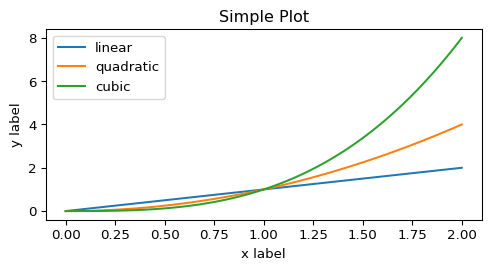

Source: [Official `matplotlib` Documentation](https://matplotlib.org/stable/users/explain/quick_start.html)

## Implicit Approach

``` python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
```

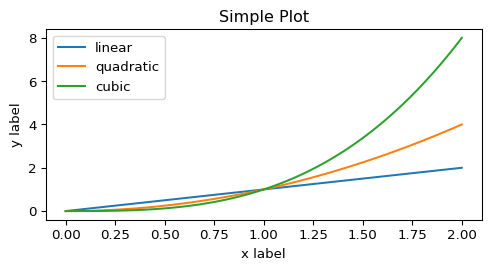

Source: [Official `matplotlib` Documentation](https://matplotlib.org/stable/users/explain/quick_start.html)

These elements are the minimum required to understand the logic of `matplotlib`. To become more comfortable with these concepts, repeated practice is essential.

## 1.2 Discovering `matplotlib` through `Pandas`

It’s often handy to produce a graph quickly, without necessarily worrying too much about style, but to get a quick idea of the statistical distribution of your data. For this, the integration of basic graphical functions in `Pandas` is handy: you can directly apply a few instructions to a `DataFrame` and it will produce a `matplotlib` figure.

The aim of Exercise 1 is to discover these instructions and how the result can quickly be reworked for visual descriptive statistics.

> **Exercise 1: Create an initial plot**
>
> The data includes several dimensions that can be analyzed statistically. We’ll start by focusing on the volume of passage at various counting stations.
>
> Since our goal is to summarize the information in our dataset, we first need to perform some *ad hoc* aggregations to create a readable plot.
>
> 1.  Retain the ten stations with the highest average. To get an ordered plot from largest to smallest using `Pandas` plot methods, the data must be sorted from smallest to largest (yes, it’s odd but that’s how it works…). Sort the data accordingly.
>
> 2.  Initially, without worrying about styling or aesthetics, create the structure of a *barplot* (bar chart) as seen on the
>     [data analysis page](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name).
>
> 3.  To prepare for the second figure, retain only the 10 stations that recorded the highest total number of bicycles.
>
> 4.  As in question 2, create a *barplot* to replicate figure 2 from the Paris open data portal.

The top 10 stations from question 1 are those with the highest average bicycle traffic. These reordered data allow for creating a clear visualization highlighting the busiest stations.

[1] Thankfully, with a vast amount of online code using `matplotlib`, code assistants like `ChatGPT` or `Github Copilot` are invaluable for creating charts based on instructions.

<a href="#fig-figure1-exo1-en" class="quarto-xref">Figure 1.2</a>, displays the data in a basic *barplot*. While it conveys the essential information, it lacks aesthetic layout, harmonious colors, and clear annotations, which are necessary to improve readability and visual impact.

<details open>

<summary>

Figure 1 (click here to mask)

</summary>

<figure id="fig-figure1-exo1-en">
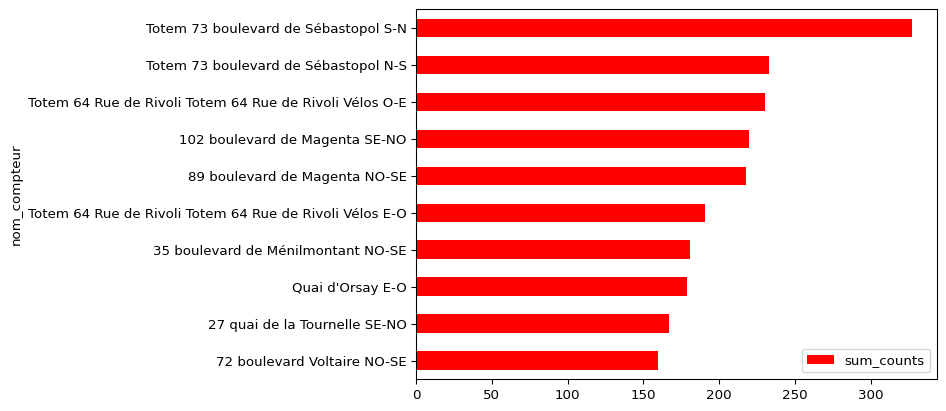
<figcaption>Figure 1.2: First draft for ‘The 10 meters with the highest hourly average’</figcaption>
</figure>

</details>

<details open>

<summary>

Figure 2 without styling (click here to mask):

</summary>

<figure id="fig-figure2-exo1-en">
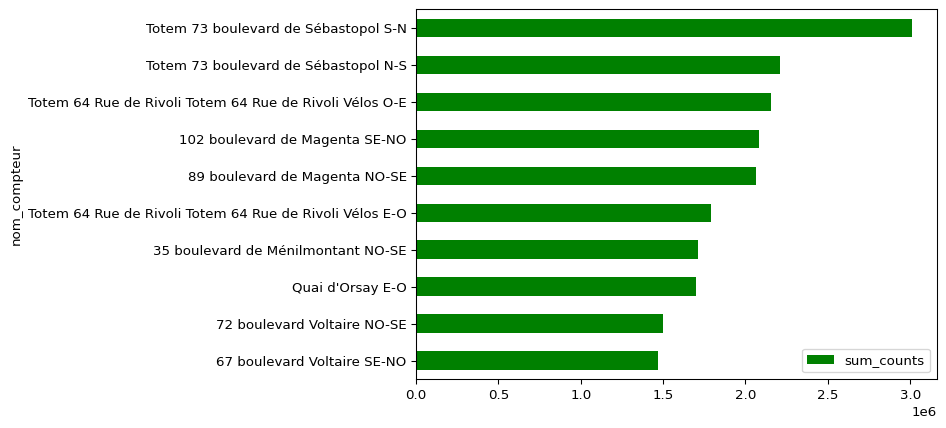
<figcaption>Figure 1.3: First draft of the figure ‘The 10 counters that recorded the most bicycles’</figcaption>
</figure>

</details>

Our visualization starts to communicate a concise message about the nature of the data. In this case, the intended message is the relative hierarchy of station usage.

Nevertheless, several issues remain. Some elements are problematic (for example, labels), others are inconsistent (such as axis titles), and still others are missing altogether (including the title of the graph). This figure remains somewhat unfinished.

Since the graphs produced by `Pandas` are based on the highly flexible logic of `matplotlib`, they can be customized extensively. However, this often requires considerable effort, as the `matplotlib` grammar is neither as standardized nor as intuitive as that of [`ggplot` ](https://ggplot2.tidyverse.org/) in `R`. For those wishing to remain within the `matplotlib` ecosystem, it is generally preferable to use [`seaborn` ](https://seaborn.pydata.org/) directly, as it provides several ready-to-use options. Alternatively, one can turn, as we shall do here, to the [`plotnine` ](https://plotnine.org/) ecosystem, which offers the standardized `ggplot` syntax for modifying the various elements of a figure.

# 2. Using `seaborn` directly

## 2.1 Understanding `seaborn` in a Few Lines

`seaborn` is a high-level interface built on top of `matplotlib`. This package provides a set of features to create `matplotlib` figures or axes directly from a function with numerous arguments. If further customization is needed, `matplotlib` functionalities can be used to update the figure, whether through the implicit or explicit approaches described earlier.

As with `matplotlib`, the same figure can be created in multiple ways in `seaborn`. `seaborn` inherits the figure-axes duality from `matplotlib`, requiring frequent adjustments at either level. The main characteristic of `seaborn` is its standardized entry points, such as `seaborn.relplot` or `seaborn.catplot`, and its *input* logic based on `DataFrame`, whereas `matplotlib` is structured around `Numpy` arrays. However, it is important to be aware that `seaborn` suffers from the same limitations as `matplotlib`, particularly the unintuitive nature of the customisation elements, which, if not found in the arguments, can be a headache to implement.

The figure now conveys a message, but it is still not very readable. There are several ways to create a *barplot* in `seaborn`. The two main ones are:

-   `sns.catplot`
-   `sns.barplot`

For this exercise, we suggest using `sns.catplot`. It is a common entry point for plotting graphs of a discretized variable.

## 2.2 Reproduction of the previous example with `seaborn`

We will simply reproduce <a href="#fig-figure1-exo1-en" class="quarto-xref">Figure 1.2</a> with `seaborn`. To do this, here is the code needed to have a ready-to-use `DataFrame`:

In [ ]:
df1 = (
    df
    .groupby('nom_compteur')
    .agg({'sum_counts': "mean"})
    .sort_values('sum_counts', ascending = False)
    .head(10)
    .sort_values('sum_counts')
)


df1 = df1.reset_index().sort_values("sum_counts", ascending = False)

df1.head()

> **Exercise 2: reproduce the first figure with `seaborn`**
>
> 1.  Redraw the previous graph using the `catplot` function from `seaborn`. To control the size of the graph, you can use the `height` and `aspect` arguments.
>
> 2.  Add axis titles and a title to the graph.
>
> 3.  Even if it does not add any information, try colouring the `x` axis red, as in the figure on the *open data* portal. You can predefine a
>     style with `sns.set_style('ticks', {'xtick.color': 'red'})`.

At the end of question 1, i.e. using `seaborn` to reproduce a minimal barplot, we obtain <a href="#fig-fig1-exo2-en" class="quarto-xref">Figure 2.1</a>. This is already a little cleaner than the previous version (<a href="#fig-figure1-exo1-en" class="quarto-xref">Figure 1.2</a>) and may already be sufficient for exploratory work.

At the end of the exercise, we obtain a figure close to the one we are trying to reproduce. The main difference is that ours does not include numerical values.

This shows that Boulevard de Sébastopol is the most traveled, which won’t surprise you if you cycle in Paris. However, if you’re not familiar with Parisian geography, this will provide little information for you. You’ll need an additional graphical representation: a map! We will cover this in a future chapter.

# 3. And here enters `Plotnine`, a pythonic grammar of graphics

`plotnine` is the newcomer to the `Python` visualization ecosystem. This library is developed by `Posit`, the company behind the `RStudio` editor and the *tidyverse* ecosystem, which is central to the `R` language. This library aims to bring the logic of `ggplot` to `Python`, meaning a standardized, readable, and flexible grammar of graphics inspired by Wilkinson (2011).

In this approach, a chart is viewed as a succession of layers that, when combined, create the final figure. This principle is not inherently different from that of `matplotlib`. However, the grammar used by `plotnine` is far more intuitive and standardized, offering much more autonomy for modifying a chart.
![`ggplot` (and `plotnine`) logic, picture borrowed to <a href="https://datavizf24.classes.andrewheiss.com/lesson/04-lesson.html#changing-colors-shapes-and-sizes-with-scale_" target="_blank">Andrew Heiss </a>](https://datavizf24.classes.andrewheiss.com/slides/img/03/ggplot-layers@4x.png)

With `plotnine`, there is no longer a dual figure-axis entry point. As illustrated in the slides below:

1.  A figure is initialized
2.  Layers are updated, a very general abstraction level that applies to the data represented, axis scales, colors, etc.
3.  Finally, aesthetics can be adjusted by modifying axis labels, legend labels, titles, etc.

We will need hierarchical data to have bars ordered in a consistent manner:

In [ ]:
df1["nom_compteur"] = pd.Categorical(
    df1["nom_compteur"],
    categories = df1["nom_compteur"][::-1],
    ordered=True
)

> **Exercise 4: Reproduce the First Figure with `plotnine`**
>
> This is the same exercise as Exercise 2. The objective is to create this figure with `plotnine`.

For this exercise, we offer a step-by-step guided correction to illustrate the logic behind the grammar of graphs.

> **Important**
>
> For a more user-friendly layout of the step-by-step construction of this graph, you can consult the web version of this notebook and use it to replicate the figures yourself.

## 3.1 The plot grid: `ggplot()`

The first step in any figure is to define the object of the graph, i.e. the data that will be visually represented. This is done using the `ggplot` statement with the following parameters:

-   The `DataFrame`, the first parameter of any call to `ggplot`.
-   The main variable aesthetic parameters - which are inserted into `aes` (**aes**thetics) - which will be common to the different layers. In this case, we only have the axes to declare, but depending on the nature of the graph, we could have other aesthetics whose behaviour would be controlled by a variable in our dataset: colour, point size, curve width, transparency, etc.

In [ ]:
ggplot(df1, aes(x="nom_compteur", y="sum_counts"))

This gives us the structure of the graph into which all subsequent elements will be inserted. Regarding the chosen $x$ and $y$, this declaration will define a vertical bar plot. We will then see that we are going to reverse the axes to make it more readable, but that will come later.

## 3.2 Add geometries: `geom_*`

Graphical layers are defined by the `geom_` family of functions according to an additive logic (hence the `+`). These are controlled on two levels:

-   In the parameters defined by `aes`, either at the global level (`ggplot`) or at the level specific to the geometry in question (in the call to `geom_`)
-   In the constant parameters that apply uniformly to the layer, defined as constant parameters

In [ ]:
(
    ggplot(df1, aes(x="nom_compteur", y="sum_counts")) +
    geom_bar(stat="identity", fill="red")
)

You can add several successive layers. For example, the numerical values displayed to provide context can be created using `geom_text`, whose positioning on the figure is managed by the same parameters as the other layers:

In [ ]:
df1["text"] = df1["sum_counts"].round().astype(int).astype(str)

(
    ggplot(df1, aes(x="nom_compteur", y="sum_counts")) +
    geom_bar(stat="identity", fill="red") +
    geom_text(aes(label = "text"), position=position_nudge(y=30))
)

The harmonisation of visual element declarations enabled by the graphics grammar is achieved using `geom_*` geometries. It is therefore logical that their behaviour should also be controlled in a standardised manner, using another family of functions: `scale_` (`scale_x_discrete`, `scale_x_continuous`, `scale_color_discrete`, etc.).

Thus, each aesthetic (`x`, `y`, `colour`, `fill`, `size`, etc.) can be finely tuned in a systematic way via its own scale (`scale_*`). This offers almost total control over the visual translation of the data.

The functions of the `coord_*` family, which modify the coordinate system, can also be included in this category. In this case, we will use `coord_flip` to obtain a vertical bar chart.

In [ ]:
(
    ggplot(df1, aes(x="nom_compteur", y="sum_counts")) +
    geom_bar(stat="identity", fill="red") +
    geom_text(aes(label = "text"), position=position_nudge(y=30)) +
    scale_y_continuous(expand=(0, 40)) +
    coord_flip()
)

Here, there are few parameters to modify since our scales already suit us well (we don’t have to use *log* to compress the scale, apply a colour palette, etc.). We’ll just enlarge the $x$ axis a little so we can enter our numerical values. As before, when swapping coordinates with `coord_flip`, the axis in question is $y$, so we’ll play around with `scale_y_continuous`.

## 3.3 Labels and themes

The final declaration of our figure is done using the formal elements that are labels (axes, titles, reading notes, etc.) and the theme (preconfigured through the `theme_` family or customised with the parameters of the `theme` function). Before that, let’s reduce the size of our labels by $y$

In [ ]:
import textwrap

def wrap_label(s, width=30):
    return '\n'.join(textwrap.wrap(s, width=width))

df1["nom_compteur"] = df1["nom_compteur"].apply(wrap_label)

We can now customise our figure:

``` python
p = ( 
    ggplot(df1, aes(x="nom_compteur", y="sum_counts")) +
    geom_bar(stat="identity", fill="red") +
    geom_text(aes(label = "text"), position=position_nudge(y=30)) +
    scale_y_continuous(expand=(0, 40)) +
    coord_flip() +
    labs(
        title=title,
        x=xaxis,
        y=yaxis
    ) +
    theme(
        panel_background=element_rect(fill="white"),
        line=element_line(color="white"),
        axis_text_x=element_text(angle=45, hjust=1, color="red"),
        axis_title_x=element_text(color="red"),
    )
)

p
```

Figure 3.5

Although brief, this introduction to the world of ggplot graphics grammar shows just how intuitive - once you understand its logic - and powerful it is.

> **Caution**
>
> To effectively contextualize time-based data, it’s standard practice to use dates along the x-axis. To maintain readability, avoid overloading the axis with too much detail such as showing every single day when months would suffice.
>
> Rotating text vertically to squeeze more labels onto the axis isn’t a great solution - it mostly just gives your reader a sore neck. It’s often better to reduce the number of labels and, if needed, add annotations for particularly important dates.

# 4. Visualisations alternatives

So far, we have conscientiously reproduced the visualisations offered on the Paris open data dashboard. But we may want to convey the same information using different visualisations:

-   Lollipop charts are very similar to bar charts, but the visual information is a little more efficient: instead of a thick bar to represent the values, there is a thinner line, which can help to really perceive the scales of magnitude in the data.
-   Since we need to contextualise the figure with the exact values – while waiting to discover the world of interactivity – why not use a table and insert graphs into it? Tables are not a bad communication medium; on the contrary, if they offer hierarchical visual information, they can be very useful!

Bar charts (*barplot*) are extremely common, likely due to the legacy of Excel, where these charts can be created with just a couple of clicks. However, in terms of conveying a message, they are far from perfect. For example, the bars take up a lot of visual space, which can obscure the intended message about relationships between observations.

From a semiological perspective, that is, in terms of the effectiveness of conveying a message, *lollipop charts* are preferable: they convey the same information but with fewer visual elements that might clutter understanding.

*Lollipop charts* are not perfect either but are slightly more effective at conveying the message. To learn more about alternatives to bar charts, Eric Mauvière’s talk for the public statistics data scientists network, whose main message is *“Unstack your figures”*, is worth exploring ([available on ssphub.netlify.app/ ](https://ssphub.netlify.app/talk/2024-02-29-mauviere/)).

With `plotnine`, it is not too complicated to create a lollipop chart. All you need are two geometries:

1.  The stick of the lollipop is created with a `geom_segment`;
2.  The tip of the lollipop is created with a `geom_point`.

``` python
p = (
    ggplot(df1, aes(x="nom_compteur", y="sum_counts")) +
    geom_segment(aes(x="nom_compteur", xend="nom_compteur", y=0, yend="sum_counts"), size=1) +
    geom_point(color="white", fill="red", size=6, stroke=1, shape="o") +
    coord_flip() +
    labs(
        title=title,
        x=xaxis,
        y=yaxis
    ) +
    theme_minimal()
)

p
```

Figure 4.1

``` python
p = (
    ggplot(df1, aes(x="nom_compteur", y="sum_counts")) +
    geom_segment(
        aes(x="nom_compteur", xend="nom_compteur", y=0, yend="sum_counts"), size=1, color = "white"
    ) +
    geom_point(color="white", fill="red", size=6, stroke=1, shape="o") +
    coord_flip() +
    labs(
        title=title,
        x=xaxis,
        y=yaxis
    ) +
    theme_minimal() +
    theme(
        plot_background=element_rect(fill="black"),
        panel_background=element_rect(fill="black"),
        line=element_line(color="black"),
        axis_text_x=element_text(color="white"),
        axis_title_x=element_text(color="white"),
        text=element_text(color="white"),
        plot_title=element_text(ha="left")
    )
)

p
```

Figure 4.2

This alternative representation provides a clearer picture of the difference between the most frequently used counter and the others.

The lollipop chart is a fairly standard representation in biostatistics and economics for representing odds ratios derived from logistic modelling. In this case, the lines are generally used to represent the size of the confidence interval in this literature.

<figure>
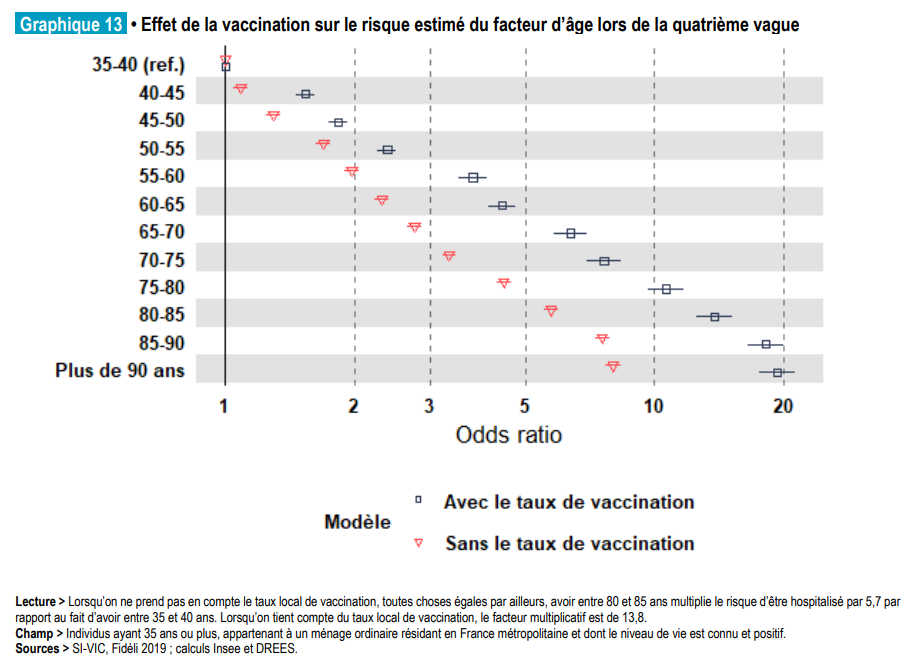
<figcaption aria-hidden="true">A variant of lollipop charts to represent odds ratios <span class="citation" data-cites="galianacaracteristiques">(Galiana et al. 2022)</span></figcaption>
</figure>

A variant of the lollipop chart, popularised in particular by <a href="https://www.datawrapper.de/" target="_blank">datawrapper </a>, also allows intervals to be represented: the range plot. It allows both the hierarchy between observations and the amplitude of a phenomenon to be represented.

\![Example of a range plot by Eric Mauvière (<a href="https://ssphub.netlify.app/talk/2024-02-29-mauviere/" target="_blank">ssphub.netlify.app/ </a>).\] (https://ssphub.netlify.app/talk/2024-02-29-mauviere/mauviere.png)

## 4.1 A stylised table

Tables are a good medium for communicating precise values. But without the addition of contextual elements, such as colour intensities or figures, they are of little help in visually perceiving discrepancies or orders of magnitude.

Thanks to the richness of the HTML format, which allows lightweight graphics to be inserted directly into cells, it is possible to combine numerical precision with visual readability. This gives us the best of both worlds.

We have previously used the <a href="https://posit-dev.github.io/great-tables/articles/intro.html" target="_blank"><code>great_tables</code> </a> package to represent aggregated statistics. Here, we will use it to integrate a lollipop chart into a table, allowing immediate reading of values while maintaining their accuracy.

We will take this opportunity to clean up the text to be displayed by removing duplicate labels and isolating the direction.

In [ ]:
df1["direction"] = df1["nom_compteur"].str.extract(
    r"([A-Z]{1,3}-[A-Z]{1,3})$"
)
df1["nom_compteur"] = df1["nom_compteur"].str.replace(
    r"([A-Z]{1,3}-[A-Z]{1,3})$", "", regex=True
)

def deduplicate_label(label):
    parts = label.split()
    mid = len(parts) // 2
    for i in range(1, mid + 1):
        if parts[:i] == parts[i:2*i]:
            return ' '.join(parts[i:])
    return label

df1["nom_compteur"] = df1["nom_compteur"].apply(deduplicate_label)
df1["nom_compteur"] = df1['nom_compteur'].str.replace("(Vélos|Totem)", "", regex=True)

df1.head()

We will also create an intermediate column to create a colourful summary visualisation allowing us to see the counters on several lines.

In [ ]:
import matplotlib.pyplot as plt

df1["nom_compteur_temp"] = df1["nom_compteur"]

# Discrete colormap
categories = df1["nom_compteur_temp"].unique()
cmap = plt.get_cmap("Dark2")

# Create mapping from label to color hex
colors = {cat: cmap(i / max(len(categories) - 1, 1)) for i, cat in enumerate(categories)}
colors = {k: plt.matplotlib.colors.to_hex(v) for k, v in colors.items()}

# Function to return colored cell
def create_color_cell(label: str) -> str:
    color = colors.get(label, "#ccc")
    return f"""
    <div style="
        width: 20px;
        height: 20px;
        background-color: {color};
        border-radius: 3px;
        margin: auto;
    "></div>
    """

We will create a dictionary to rename our columns in a more intelligible form than the variable names, as well as a variable for referencing the source.

In [ ]:
columns_mapping = {
    "nom_compteur": "Location",
    "direction": "",
    "text": "",
    "sum_counts": "",
    "nom_compteur_temp": ""
}
source_note = "**Source**: Vélib counters on the [Paris open data page](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name)"

In [ ]:
from great_tables import *

df_table = df1.loc[:, ["nom_compteur_temp","nom_compteur", "direction", "text", "sum_counts"]]

gt = (
    GT(
        df_table
    )
    .fmt(fns=create_color_cell, columns="nom_compteur_temp")
    .fmt_nanoplot(columns="sum_counts")
    .tab_spanner(
        label="Compteur",
        columns=["nom_compteur_temp", "nom_compteur", "direction"]
    )
    .tab_spanner(
        label="Moyenne horaire",
        columns=["text", "sum_counts"]
    )
    .cols_label(
        **columns_mapping
    )
    .cols_width(
        cases={
            "nom_compteur_temp": "10%",
            "nom_compteur": "40%",
            "direction": "10%",
            "text": "10%"
        }
    )
    .tab_style(
        style=[
            style.text(size = "small")
        ],
        locations = loc.body(df_table.columns.tolist())
    )
    .tab_style(
        style=[
            style.text(weight="bold")
        ],
        locations=loc.body(columns="text")
    )
    .tab_source_note(
        md(source_note)
    )
)

To make it look better on a black background, you can add a few specific settings for this purpose.

``` python
gt_dark = gt.tab_options(
    table_background_color="black",
    heading_background_color="black"
)
gt_dark
```

# 5. Reactive charts with `Javascript` wrappers

> **Important**
>
> A *tooltip* is a text that appears when hovering over an element in a chart on a computer, or when tapping on it on a smartphone. It adds an extra layer of information through interactivity and can be a useful way to declutter the main message of a visualization.
>
> That said, like any element of a chart, a tooltip requires thoughtful design to be effective. The default tooltips provided by visualization libraries are rarely sufficient. You need to consider what message the tooltip should convey as a textual complement to the visual data shown in the chart.
>
> Again, we won’t go into detail here - this topic alone could fill an entire data visualization course - but it is important to keep in mind when designing interactive charts.
>
> Another important topic we won’t cover here is *responsiveness*: the ability of a visualization (or a website more generally) to display clearly and function properly across different screen sizes. Designing for multiple devices is challenging but essential, especially given that a growing share of web traffic now comes from smartphones.
>
> In addition, accessibility is another crucial consideration in interactive visualizations. For instance, around 8% of men have some form of color vision deficiency, most commonly difficulty perceiving green (about 6%) or red (about 2%).
>
> In short, ye who enter to data visualization, abandon all hope. While the tools themselves may be easy to use, the needs they must meet are often complex.

## 5.1 Ecosystem available from `Python`

Static figures created with `matplotlib` or `plotnine` are fixed and thus have the disadvantage of not allowing interaction with the viewer. All the information must be contained in the figure, which can make it difficult to read. If the figure is well-made with multiple levels of information, it can still work well.

However, thanks to *web* technologies, it is simpler to offer visualizations with multiple levels. A first level of information, the quick glance, may be enough to grasp the main messages of the visualization. Then, a more deliberate behavior of seeking secondary information can provide further insights. Reactive visualizations, now the standard in the *dataviz* world, allow for this approach: the viewer can hover over the visualization to find additional information (e.g., exact values) or click to display complementary details.

These visualizations rely on the same triptych as the entire *web* ecosystem: `HTML`, `CSS`, and `JavaScript`. `Python` users will not directly manipulate these languages, which require a certain level of expertise. Instead, they use libraries that automatically generate all the necessary `HTML`, `CSS`, and `JavaScript` code to create the figure.

Several `Javascript` ecosystems are made available to developers through `Python`. The two main libraries are [`Plotly`](https://plotly.com/python/), associated with the `Javascript` ecosystem of the same name, and [`Altair`](https://altair-viz.github.io/), associated with the `Vega` and `Altair` ecosystems in `Javascript`[1]. To allow Python users to explore the emerging `Javascript` library [`Observable Plot`](https://observablehq.com/plot/), French research engineer Julien Barnier developed [`pyobsplot`](https://juba.github.io/pyobsplot/), a `Python` library enabling the use of this ecosystem from `Python`.

Interactivity should not just be a gimmick that adds no readability or even worsens it. It is rare to rely solely on the figure as produced without further work to make it effective.

## 5.2 The `Plotly` library

The `Plotly` package is a wrapper for the `Javascript` library `Plotly.js`, allowing for the creation and manipulation of graphical objects very flexibly to produce interactive objects without the need for Javascript.

The recommended entry point is the `plotly.express` module ([documentation here](https://plotly.com/python/plotly-express/)), which provides an intuitive approach for creating charts that can be modified *post hoc* if needed (e.g., to customize axes).

> **Displaying Figures Created with `Plotly`**
>
> In a standard `Jupyter` notebook, the following lines of code allow the output of a `Plotly` command to be displayed under a code block:
>
> For `JupyterLab`, the `jupyterlab-plotly` extension is required:
>
> ``` python
> !jupyter labextension install jupyterlab-plotly
> ```

## 5.3 Replicating the Previous Example with `Plotly`

The following modules will be required to create charts with `plotly`:

[1] The names of these libraries are inspired by the Summer Triangle constellation, of which Vega and Altair are two members.

In [ ]:
import plotly
import plotly.express as px

> **Exercise 7: A Barplot with `Plotly`**
>
> The goal is to recreate the first red bar chart using `Plotly`.
>
> 1.  Create the chart using the appropriate function from `plotly.express` and…
>
>     -   Do not use the default theme but one with a white background to achieve a result similar to that on the *open-data* site.
>     -   Use the `color_discrete_sequence` argument for the red color.
>     -   Remember to label the axes.
>
> 2.  Modify the hover text.
>
> 3.  Choose a white or a dark theme and use appropriate options.

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="100.0%" data-layout-align="left">
<div>
<div>            <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-AMS-MML_SVG"></script><script type="text/javascript">if (window.MathJax && window.MathJax.Hub && window.MathJax.Hub.Config) {window.MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}</script>                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script charset="utf-8" src="https://cdn.plot.ly/plotly-3.0.1.min.js"></script>                <div id="34e42f41-563c-4e24-9094-711366780018" class="plotly-graph-div" style="height:525px; width:100%;"></div>            <script type="text/javascript">                window.PLOTLYENV=window.PLOTLYENV || {};                                if (document.getElementById("34e42f41-563c-4e24-9094-711366780018")) {                    Plotly.newPlot(                        "34e42f41-563c-4e24-9094-711366780018",                        [{"hovertemplate":"\u003cb\u003e%{y}\u003c\u002fb\u003e\u003cbr\u003eMoyenne horaire: %{x:.1f}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"","marker":{"color":"red","pattern":{"shape":""}},"name":"","orientation":"h","showlegend":false,"textposition":"auto","x":{"dtype":"f8","bdata":"AGRHs0DxY0BQQE5kr91kQAuFt7\u002f3WmZApiaSg6qLZkBjU9jsRNtnQHLyVBAGLWtAzx3qQ\u002fhsa0Dqvn32u8lsQGyITrrtEW1AlVu343RxdEA="},"xaxis":"x","y":["72 boulevard Voltaire ","27 quai de la Tournelle ","Quai d'Orsay ","35 boulevard de Ménilmontant\n"," 64 Rue de Rivoli ","89 boulevard de Magenta ","102 boulevard de Magenta "," 64 Rue de Rivoli "," 73 boulevard de\nSébastopol "," 73 boulevard de\nSébastopol "],"yaxis":"y","type":"bar"}],                        {"template":{"data":{"barpolar":[{"marker":{"line":{"color":"white","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"white","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"bar"}],"carpet":[{"aaxis":{"endlinecolor":"#2a3f5f","gridcolor":"#C8D4E3","linecolor":"#C8D4E3","minorgridcolor":"#C8D4E3","startlinecolor":"#2a3f5f"},"baxis":{"endlinecolor":"#2a3f5f","gridcolor":"#C8D4E3","linecolor":"#C8D4E3","minorgridcolor":"#C8D4E3","startlinecolor":"#2a3f5f"},"type":"carpet"}],"choropleth":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"choropleth"}],"contourcarpet":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"contourcarpet"}],"contour":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"contour"}],"heatmap":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"heatmap"}],"histogram2dcontour":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"histogram2dcontour"}],"histogram2d":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"histogram2d"}],"histogram":[{"marker":{"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"histogram"}],"mesh3d":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"mesh3d"}],"parcoords":[{"line":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"parcoords"}],"pie":[{"automargin":true,"type":"pie"}],"scatter3d":[{"line":{"colorbar":{"outlinewidth":0,"ticks":""}},"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatter3d"}],"scattercarpet":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattercarpet"}],"scattergeo":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattergeo"}],"scattergl":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattergl"}],"scattermapbox":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattermapbox"}],"scattermap":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattermap"}],"scatterpolargl":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatterpolargl"}],"scatterpolar":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatterpolar"}],"scatter":[{"fillpattern":{"fillmode":"overlay","size":10,"solidity":0.2},"type":"scatter"}],"scatterternary":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatterternary"}],"surface":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"surface"}],"table":[{"cells":{"fill":{"color":"#EBF0F8"},"line":{"color":"white"}},"header":{"fill":{"color":"#C8D4E3"},"line":{"color":"white"}},"type":"table"}]},"layout":{"annotationdefaults":{"arrowcolor":"#2a3f5f","arrowhead":0,"arrowwidth":1},"autotypenumbers":"strict","coloraxis":{"colorbar":{"outlinewidth":0,"ticks":""}},"colorscale":{"diverging":[[0,"#8e0152"],[0.1,"#c51b7d"],[0.2,"#de77ae"],[0.3,"#f1b6da"],[0.4,"#fde0ef"],[0.5,"#f7f7f7"],[0.6,"#e6f5d0"],[0.7,"#b8e186"],[0.8,"#7fbc41"],[0.9,"#4d9221"],[1,"#276419"]],"sequential":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"sequentialminus":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]},"colorway":["#636efa","#EF553B","#00cc96","#ab63fa","#FFA15A","#19d3f3","#FF6692","#B6E880","#FF97FF","#FECB52"],"font":{"color":"#2a3f5f"},"geo":{"bgcolor":"white","lakecolor":"white","landcolor":"white","showlakes":true,"showland":true,"subunitcolor":"#C8D4E3"},"hoverlabel":{"align":"left"},"hovermode":"closest","mapbox":{"style":"light"},"margin":{"b":0,"l":0,"r":0,"t":30},"paper_bgcolor":"white","plot_bgcolor":"white","polar":{"angularaxis":{"gridcolor":"#EBF0F8","linecolor":"#EBF0F8","ticks":""},"bgcolor":"white","radialaxis":{"gridcolor":"#EBF0F8","linecolor":"#EBF0F8","ticks":""}},"scene":{"xaxis":{"backgroundcolor":"white","gridcolor":"#DFE8F3","gridwidth":2,"linecolor":"#EBF0F8","showbackground":true,"ticks":"","zerolinecolor":"#EBF0F8"},"yaxis":{"backgroundcolor":"white","gridcolor":"#DFE8F3","gridwidth":2,"linecolor":"#EBF0F8","showbackground":true,"ticks":"","zerolinecolor":"#EBF0F8"},"zaxis":{"backgroundcolor":"white","gridcolor":"#DFE8F3","gridwidth":2,"linecolor":"#EBF0F8","showbackground":true,"ticks":"","zerolinecolor":"#EBF0F8"}},"shapedefaults":{"line":{"color":"#2a3f5f"}},"ternary":{"aaxis":{"gridcolor":"#DFE8F3","linecolor":"#A2B1C6","ticks":""},"baxis":{"gridcolor":"#DFE8F3","linecolor":"#A2B1C6","ticks":""},"bgcolor":"white","caxis":{"gridcolor":"#DFE8F3","linecolor":"#A2B1C6","ticks":""}},"title":{"x":0.05},"xaxis":{"automargin":true,"gridcolor":"#EBF0F8","linecolor":"#EBF0F8","ticks":"","title":{"standoff":15},"zerolinecolor":"#EBF0F8","zerolinewidth":2},"yaxis":{"automargin":true,"gridcolor":"#EBF0F8","linecolor":"#EBF0F8","ticks":"","title":{"standoff":15},"zerolinecolor":"#EBF0F8","zerolinewidth":2}}},"xaxis":{"anchor":"y","domain":[0.0,1.0],"title":{"text":"Meter name"}},"yaxis":{"anchor":"x","domain":[0.0,1.0],"title":{"text":"Hourly average"},"categoryorder":"total ascending"},"legend":{"tracegroupgap":0},"barmode":"stack","title":{"text":"The 10 bikemeters with the highest hourly average"}},                        {"responsive": true}                    ).then(function(){
                            &#10;var gd = document.getElementById('34e42f41-563c-4e24-9094-711366780018');
var x = new MutationObserver(function (mutations, observer) {{
        var display = window.getComputedStyle(gd).display;
        if (!display || display === 'none') {{
            console.log([gd, 'removed!']);
            Plotly.purge(gd);
            observer.disconnect();
        }}
}});
&#10;// Listen for the removal of the full notebook cells
var notebookContainer = gd.closest('#notebook-container');
if (notebookContainer) {{
    x.observe(notebookContainer, {childList: true});
}}
&#10;// Listen for the clearing of the current output cell
var outputEl = gd.closest('.output');
if (outputEl) {{
    x.observe(outputEl, {childList: true});
}}
&#10;                        })                };            </script>        </div>
<p>(a)</p>
</div>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="100.0%" data-layout-align="left">
<div>
<div>            <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-AMS-MML_SVG"></script><script type="text/javascript">if (window.MathJax && window.MathJax.Hub && window.MathJax.Hub.Config) {window.MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}</script>                <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script charset="utf-8" src="https://cdn.plot.ly/plotly-3.0.1.min.js"></script>                <div id="62642f1d-70b4-43e8-af2c-c4668f9ce99c" class="plotly-graph-div" style="height:525px; width:100%;"></div>            <script type="text/javascript">                window.PLOTLYENV=window.PLOTLYENV || {};                                if (document.getElementById("62642f1d-70b4-43e8-af2c-c4668f9ce99c")) {                    Plotly.newPlot(                        "62642f1d-70b4-43e8-af2c-c4668f9ce99c",                        [{"hovertemplate":"\u003cb\u003e%{y}\u003c\u002fb\u003e\u003cbr\u003eMoyenne horaire: %{x:.1f}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"","marker":{"color":"red","pattern":{"shape":""}},"name":"","orientation":"h","showlegend":false,"textposition":"auto","x":{"dtype":"f8","bdata":"AGRHs0DxY0BQQE5kr91kQAuFt7\u002f3WmZApiaSg6qLZkBjU9jsRNtnQHLyVBAGLWtAzx3qQ\u002fhsa0Dqvn32u8lsQGyITrrtEW1AlVu343RxdEA="},"xaxis":"x","y":["72 boulevard Voltaire ","27 quai de la Tournelle ","Quai d'Orsay ","35 boulevard de Ménilmontant\n"," 64 Rue de Rivoli ","89 boulevard de Magenta ","102 boulevard de Magenta "," 64 Rue de Rivoli "," 73 boulevard de\nSébastopol "," 73 boulevard de\nSébastopol "],"yaxis":"y","type":"bar"}],                        {"template":{"data":{"barpolar":[{"marker":{"line":{"color":"rgb(17,17,17)","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"bar":[{"error_x":{"color":"#f2f5fa"},"error_y":{"color":"#f2f5fa"},"marker":{"line":{"color":"rgb(17,17,17)","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"bar"}],"carpet":[{"aaxis":{"endlinecolor":"#A2B1C6","gridcolor":"#506784","linecolor":"#506784","minorgridcolor":"#506784","startlinecolor":"#A2B1C6"},"baxis":{"endlinecolor":"#A2B1C6","gridcolor":"#506784","linecolor":"#506784","minorgridcolor":"#506784","startlinecolor":"#A2B1C6"},"type":"carpet"}],"choropleth":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"choropleth"}],"contourcarpet":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"contourcarpet"}],"contour":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"contour"}],"heatmap":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"heatmap"}],"histogram2dcontour":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"histogram2dcontour"}],"histogram2d":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"histogram2d"}],"histogram":[{"marker":{"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"histogram"}],"mesh3d":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"mesh3d"}],"parcoords":[{"line":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"parcoords"}],"pie":[{"automargin":true,"type":"pie"}],"scatter3d":[{"line":{"colorbar":{"outlinewidth":0,"ticks":""}},"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatter3d"}],"scattercarpet":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattercarpet"}],"scattergeo":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattergeo"}],"scattergl":[{"marker":{"line":{"color":"#283442"}},"type":"scattergl"}],"scattermapbox":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattermapbox"}],"scattermap":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scattermap"}],"scatterpolargl":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatterpolargl"}],"scatterpolar":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatterpolar"}],"scatter":[{"marker":{"line":{"color":"#283442"}},"type":"scatter"}],"scatterternary":[{"marker":{"colorbar":{"outlinewidth":0,"ticks":""}},"type":"scatterternary"}],"surface":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"type":"surface"}],"table":[{"cells":{"fill":{"color":"#506784"},"line":{"color":"rgb(17,17,17)"}},"header":{"fill":{"color":"#2a3f5f"},"line":{"color":"rgb(17,17,17)"}},"type":"table"}]},"layout":{"annotationdefaults":{"arrowcolor":"#f2f5fa","arrowhead":0,"arrowwidth":1},"autotypenumbers":"strict","coloraxis":{"colorbar":{"outlinewidth":0,"ticks":""}},"colorscale":{"diverging":[[0,"#8e0152"],[0.1,"#c51b7d"],[0.2,"#de77ae"],[0.3,"#f1b6da"],[0.4,"#fde0ef"],[0.5,"#f7f7f7"],[0.6,"#e6f5d0"],[0.7,"#b8e186"],[0.8,"#7fbc41"],[0.9,"#4d9221"],[1,"#276419"]],"sequential":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"sequentialminus":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]},"colorway":["#636efa","#EF553B","#00cc96","#ab63fa","#FFA15A","#19d3f3","#FF6692","#B6E880","#FF97FF","#FECB52"],"font":{"color":"#f2f5fa"},"geo":{"bgcolor":"rgb(17,17,17)","lakecolor":"rgb(17,17,17)","landcolor":"rgb(17,17,17)","showlakes":true,"showland":true,"subunitcolor":"#506784"},"hoverlabel":{"align":"left"},"hovermode":"closest","mapbox":{"style":"dark"},"margin":{"b":0,"l":0,"r":0,"t":30},"paper_bgcolor":"rgb(17,17,17)","plot_bgcolor":"rgb(17,17,17)","polar":{"angularaxis":{"gridcolor":"#506784","linecolor":"#506784","ticks":""},"bgcolor":"rgb(17,17,17)","radialaxis":{"gridcolor":"#506784","linecolor":"#506784","ticks":""}},"scene":{"xaxis":{"backgroundcolor":"rgb(17,17,17)","gridcolor":"#506784","gridwidth":2,"linecolor":"#506784","showbackground":true,"ticks":"","zerolinecolor":"#C8D4E3"},"yaxis":{"backgroundcolor":"rgb(17,17,17)","gridcolor":"#506784","gridwidth":2,"linecolor":"#506784","showbackground":true,"ticks":"","zerolinecolor":"#C8D4E3"},"zaxis":{"backgroundcolor":"rgb(17,17,17)","gridcolor":"#506784","gridwidth":2,"linecolor":"#506784","showbackground":true,"ticks":"","zerolinecolor":"#C8D4E3"}},"shapedefaults":{"line":{"color":"#f2f5fa"}},"sliderdefaults":{"bgcolor":"#C8D4E3","bordercolor":"rgb(17,17,17)","borderwidth":1,"tickwidth":0},"ternary":{"aaxis":{"gridcolor":"#506784","linecolor":"#506784","ticks":""},"baxis":{"gridcolor":"#506784","linecolor":"#506784","ticks":""},"bgcolor":"rgb(17,17,17)","caxis":{"gridcolor":"#506784","linecolor":"#506784","ticks":""}},"title":{"x":0.05},"updatemenudefaults":{"bgcolor":"#506784","borderwidth":0},"xaxis":{"automargin":true,"gridcolor":"#283442","linecolor":"#506784","ticks":"","title":{"standoff":15},"zerolinecolor":"#283442","zerolinewidth":2},"yaxis":{"automargin":true,"gridcolor":"#283442","linecolor":"#506784","ticks":"","title":{"standoff":15},"zerolinecolor":"#283442","zerolinewidth":2}}},"xaxis":{"anchor":"y","domain":[0.0,1.0],"title":{"text":"Meter name"}},"yaxis":{"anchor":"x","domain":[0.0,1.0],"title":{"text":"Hourly average"},"categoryorder":"total ascending"},"legend":{"tracegroupgap":0},"barmode":"stack","title":{"text":"The 10 bikemeters with the highest hourly average"}},                        {"responsive": true}                    ).then(function(){
                            &#10;var gd = document.getElementById('62642f1d-70b4-43e8-af2c-c4668f9ce99c');
var x = new MutationObserver(function (mutations, observer) {{
        var display = window.getComputedStyle(gd).display;
        if (!display || display === 'none') {{
            console.log([gd, 'removed!']);
            Plotly.purge(gd);
            observer.disconnect();
        }}
}});
&#10;// Listen for the removal of the full notebook cells
var notebookContainer = gd.closest('#notebook-container');
if (notebookContainer) {{
    x.observe(notebookContainer, {childList: true});
}}
&#10;// Listen for the clearing of the current output cell
var outputEl = gd.closest('.output');
if (outputEl) {{
    x.observe(outputEl, {childList: true});
}}
&#10;                        })                };            </script>        </div>
<p>(b)</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Figure 5.1

## 5.4 The `altair` library

For this example, we will recreate our previous figure.

Like `ggplot`/`plotnine`, `Vega` is a graphics ecosystem designed to implement the grammar of graphics from Wilkinson (2011). The syntax of `Vega` is therefore based on a declarative principle: a construction is declared through layers and progressive data transformations.

Originally, `Vega` was based on a JSON syntax, hence its strong connection to `Javascript`. However, there is a Python API that allows for creating these types of interactive figures natively in Python. To understand the logic of constructing an `altair` code, here is how to replicate the previous figure:

In [ ]:
import altair as alt

fig_altair = (
    alt.Chart(df1.reset_index())
    .mark_bar(color='steelblue') 
    .encode(
        x=alt.X('sum_counts:Q', title=xaxis),
        y=alt.Y('nom_compteur:N', sort='-x', title=yaxis),
        tooltip=[
            alt.Tooltip('nom_compteur:N', title=xaxis),
            alt.Tooltip('sum_counts:Q', title=yaxis)
        ]
    ).properties(
        title=title
    ).configure_view(
        strokeOpacity=0
    )
)

fig_altair.interactive()

# References

Galiana, Lino, Olivier Meslin, Noémie Courtejoie, and Simon Delage. 2022. “Caractéristiques Socio-<span class="nocase">é</span>conomiques Des Individus Aux Formes sévères de Covid-19 Au Fil Des Vagues <span class="nocase">é</span>pidémiques.”

Wilkinson, Leland. 2011. “The Grammar of Graphics.” In *Handbook of Computational Statistics: Concepts and Methods*, 375–414. Springer.